<a href="https://colab.research.google.com/github/Mary7Magdalene/Reffence/blob/main/IMAGE_CLASSIFICATION_USING_TENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout,Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory


import os
import matplotlib.image as mpimg

In [18]:
#importing the dataset
from zipfile import ZipFile
data_path = '/content/dog-vs-cat.zip'
with ZipFile(data_path, 'r') as zip:
  zip.extractall()
  print('The dataset has been extracted')

The dataset has been extracted


DATA VISUALIZATION

In [22]:
path = 'animals'
classes = os.listdir(path)
classes


['cat', 'dog']

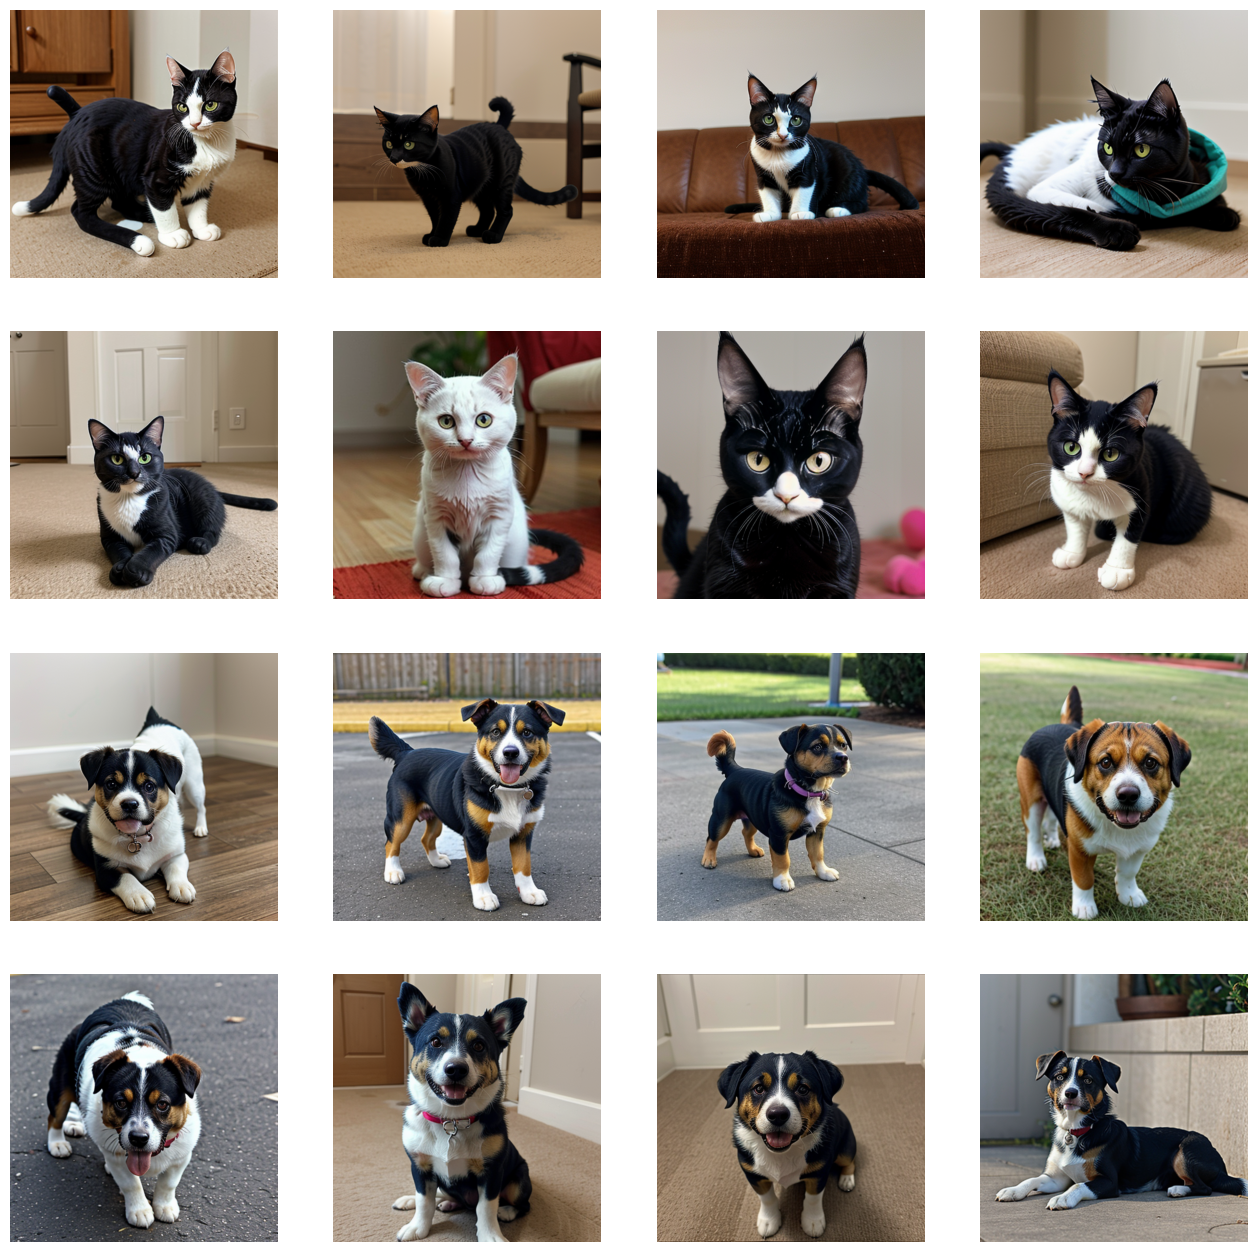

In [31]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('animals/cat')
dog_dir = os.path.join('animals/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


DATA PREPARATION FOR TRAINING

In [32]:
base_dir = 'animals'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 1000 files belonging to 2 classes.
Using 900 files for training.
Found 1000 files belonging to 2 classes.
Using 100 files for validation.


MODEL ARCHITECTURE

In [33]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

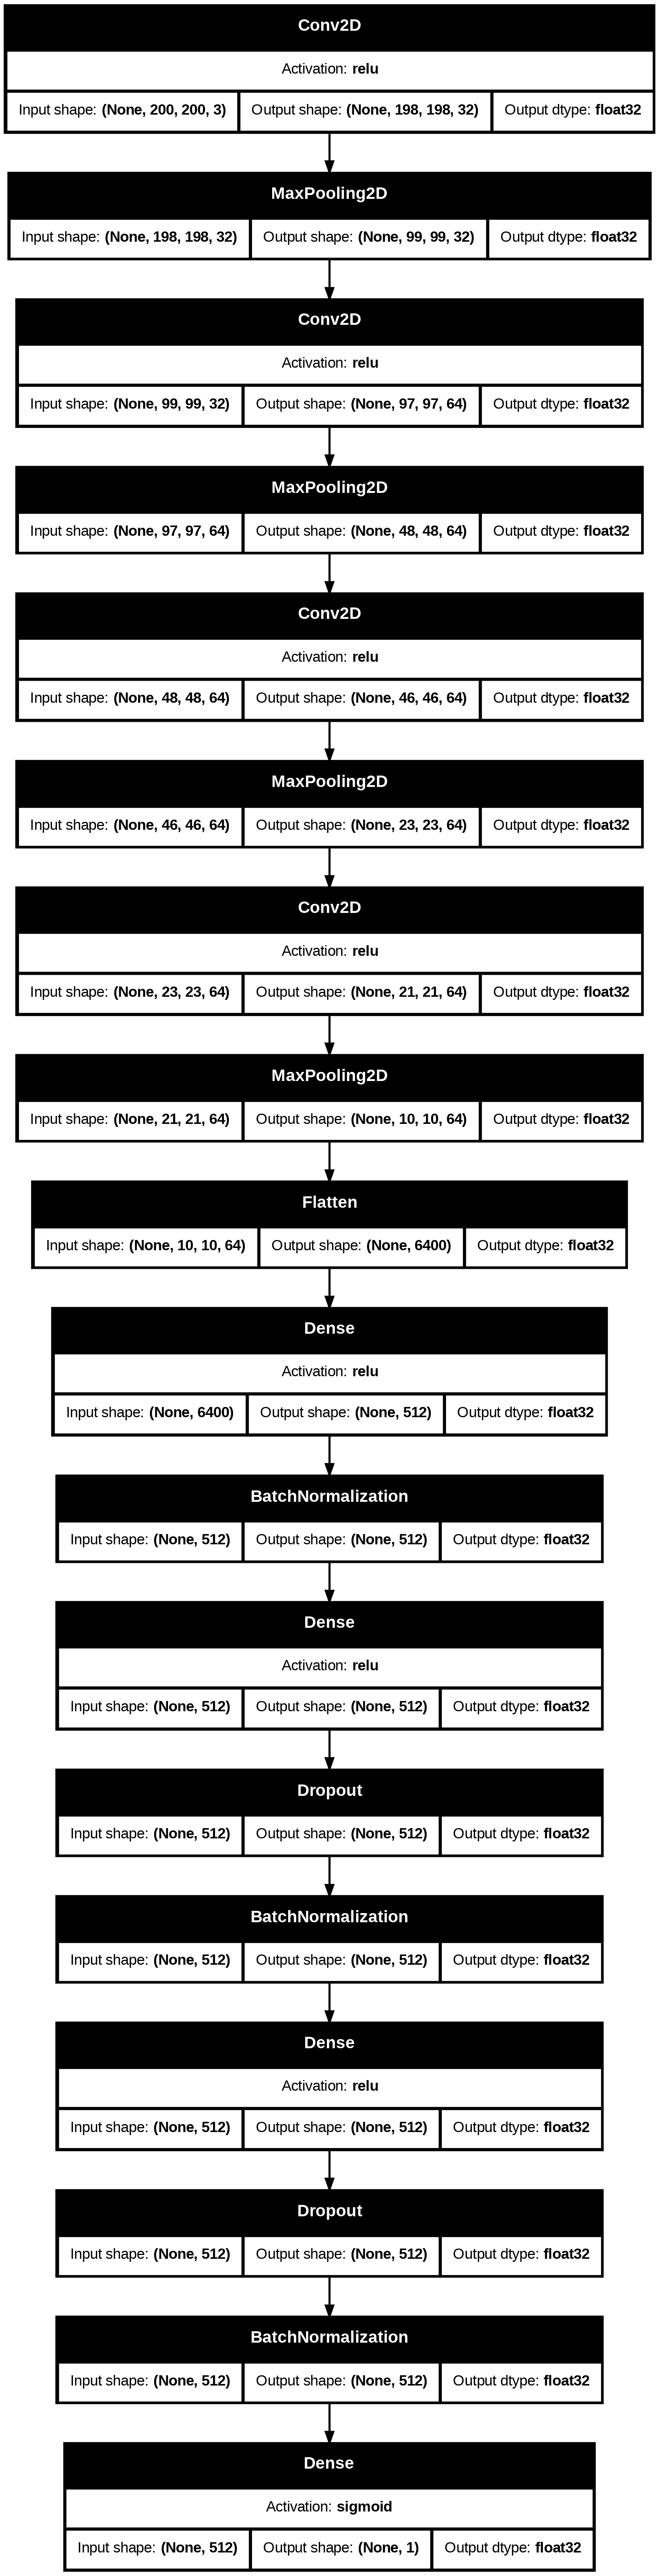

In [34]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


MODEL TRAINING

In [36]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6652 - loss: 0.7540 - val_accuracy: 0.6300 - val_loss: 1.4087
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8403 - loss: 0.4002 - val_accuracy: 0.5300 - val_loss: 4.3585
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9031 - loss: 0.2602 - val_accuracy: 0.5300 - val_loss: 9.9961
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9319 - loss: 0.1796 - val_accuracy: 0.5300 - val_loss: 8.2985
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9306 - loss: 0.1472 - val_accuracy: 0.5900 - val_loss: 1.9320
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9515 - loss: 0.1280 - val_accuracy: 0.4800 - val_loss: 4.6788
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8884 - loss: 0.2973 - val_accuracy: 0.8300 - val_loss: 0.4304
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9552 - loss: 0.1271 - val_accuracy: 0.8400 - val_loss

MODEL EVALUATION

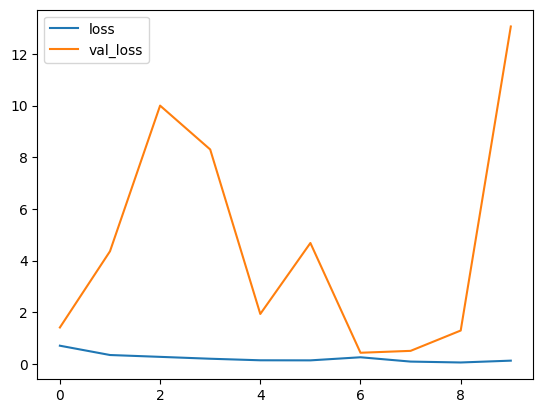

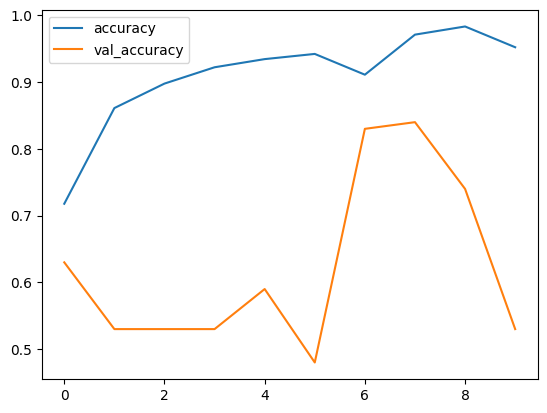

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


MODEL TESTING AND PREDICTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Cat


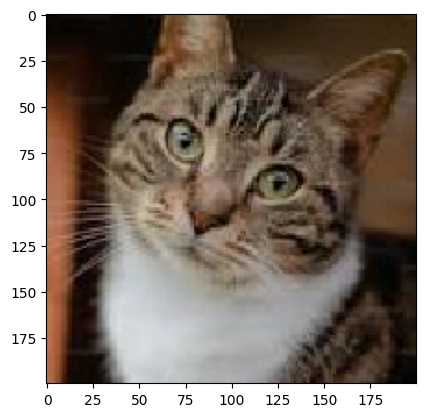

In [38]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/1.jpeg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Cat


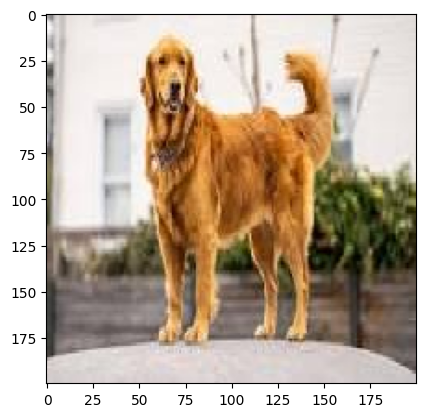

In [39]:
test_image = image.load_img('/content/2.jpeg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
    print("Dog")
else:
    print("Cat")
